In [38]:
#bibliotecas básicas para manipulação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [39]:
#bibliotecas para fase de pre-processamento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [40]:
#bibliotecas de modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#bibliotecas auxiliares
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [42]:
train = pd.read_csv('/content/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [43]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [44]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [45]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [46]:
#numéricas: age, RoomService,	FoodCourt,	ShoppingMall,	Spa,	VRDeck
#categóricas: HomePlanet,	CryoSleep,	Cabin,	Destination, VIP, Name
#alvo: Transported

In [47]:
nave = train.append(test, ignore_index=True)
nave

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [48]:
nave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [49]:
nave.shape

(12970, 14)

In [50]:
nulos = nave.isnull().sum()
print(nulos[nulos > 0])

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


In [51]:
nave.duplicated().sum()

0

In [52]:
nave.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


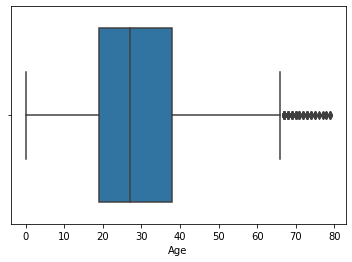

In [53]:
sns.boxplot(x = nave['Age'])

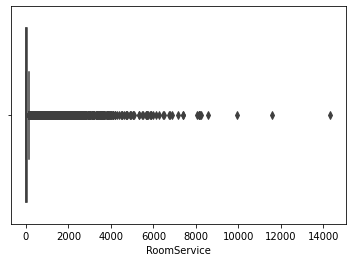

In [54]:
sns.boxplot(x = nave['RoomService'])

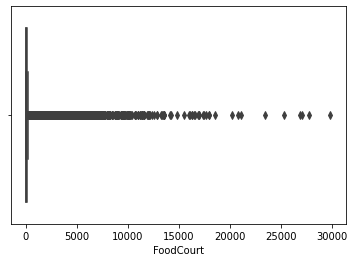

In [55]:
sns.boxplot(x = nave['FoodCourt'])

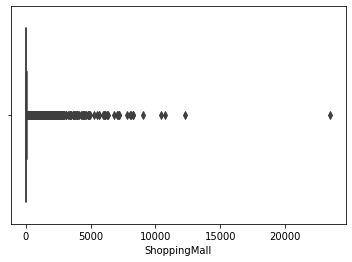

In [56]:
sns.boxplot(x = nave['ShoppingMall'])

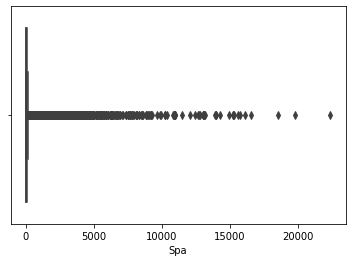

In [57]:
sns.boxplot(x = nave['Spa'])

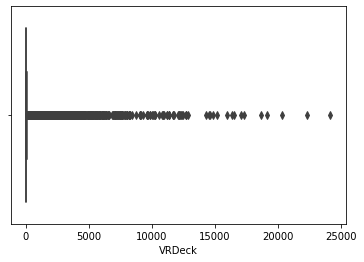

In [58]:
sns.boxplot(x = nave['VRDeck'])

# primeira função (RESUMO)

In [59]:
def resumo(df, coluna, count = True):
  print(f'Quantidade de valores únicos: {df[coluna].nunique()}')
  print(f'Valores úncis: {df[coluna].unique()}')
  print(f'Valores nulos: {df[coluna].isnull().sum()}')
  print(f'Valores únicos: \n{df[coluna].value_counts()}')
  #pallete = 'bright'

  if count == "True":
    sns.countplot(data = df, x = coluna, hue = 'Transported', palette = 'bright')
  else:
    sns.displot(data = df, x = coluna, hue = 'Transported', palette = 'bright')

Quantidade de valores únicos: 3
Valores úncis: ['Europa' 'Earth' 'Mars' nan]
Valores nulos: 288
Valores únicos: 
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64


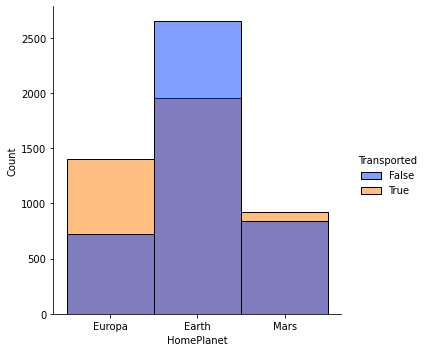

In [60]:
resumo(nave, 'HomePlanet')

In [61]:
#nota-se que, referente ao planeta de origem, muito mais gente saiu da terra do que de europa e marte
#ainda, verifica-se que a maioria dos que sairam da terra não foram transportados para a realidade paralela;
#enquanto isso, daqueles que tem europa como local de origem, nota-se que a maioria foi transportada.
# e para aqueles vindo de marte, a maioria foi transportada para outra realidade, sendo esse, os transportados, levemente acima da quantidade não trnasportada

#dito isso, Homeplanet parece ser uma variável relevante para predizer quem foi ou não transportando para uma realidade paralela

In [62]:
nave.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Quantidade de valores únicos: 2
Valores úncis: [ 0.  1. nan]
Valores nulos: 310
Valores únicos: 
0.0    8079
1.0    4581
Name: CryoSleep, dtype: int64


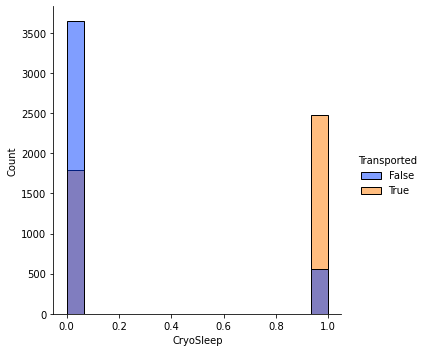

In [63]:
nave['CryoSleep']=nave['CryoSleep'].astype(np.float)
resumo(nave, 'CryoSleep', False)

In [64]:
conta1 = 8079 / (8079 + 4581)
conta1

0.6381516587677725

In [65]:
conta1nulo = 310 / (8079 + 4581)
conta1nulo

0.02448657187993681

In [66]:
#são 2 valores unicos correspondetes a 0 e 1 para sono criogênico
#além disso, existem 310 valores nulos (2%) e a distriuibção dos resultados ficaram em sua maioria para 0 (63%)
#em relação aos transportados, nota-se que 0 (não criogênico) a maioria não foi transportado apesar de ser um numero significante daqueles que foram
#já sobre os que tiveram sono criogênico, nota-se que a maioria esmagadora foram transportados.

#em posse dessas informações, é possivel verificar que é relevante para a predição a inclusão de cryosleep.

In [67]:
nave.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [68]:
#suspendi o gráfico de "Cabin" pq são muitas as respostas únicas e estava demorando para entregar o resultado
#Quantidade de valores únicos: 9825
#Valores úncis: ['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
#Valores nulos: 299

Quantidade de valores únicos: 3
Valores úncis: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Valores nulos: 274
Valores únicos: 
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64


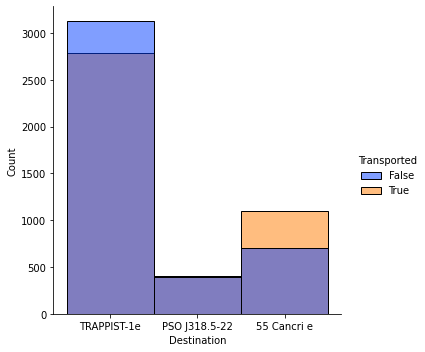

In [69]:
resumo(nave, 'Destination')

In [70]:
274 / (8871 + 2641 + 1184)

0.02158160050409578

In [71]:
8871 / (8871 + 2641 + 1184)

0.6987240075614367

In [72]:
2641 / (8871 + 2641 + 1184)

0.20801827347195967

In [78]:
#em destination, existem 3 valores unicos: 'TRAPPIST-1e', 'PSO J318.5-22' e '55 Cancri e'
#com valores unicos de 274 (2%)
#o mais frequente é "TRAPPIST-1e" com 69% das amostras; seguido por "55 cancri e" (20%)
#em TRAPPIST-1e, a maioria não foi transportada, para 'PSO J318.5-22', a divisão entre os que foram e os que não foram ficou praticamente igual
# e "55 cancri e" teve a maioria sendo transportada.

#Assim, lugar de destino pode ser uma das features

In [74]:
nave.loc[nave['Destination'] == 'TRAPPIST-1e']['Transported'].value_counts()

False    3128
True     2787
Name: Transported, dtype: int64

Quantidade de valores únicos: 80
Valores úncis: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Valores nulos: 270
Valores únicos: 
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64


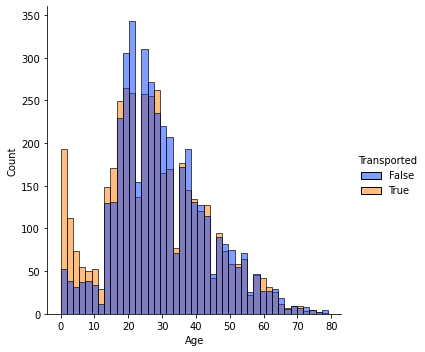

In [77]:
resumo(nave, 'Age')

In [80]:
#existem 80 valores únicos em age;
#sendo 270 valores nulos;
#o top 3 das idades mais frequentes são: 18, 24, 21.
#proporcionalmente falando, quanto menor a idade, maior a chance de ser transportado
#a partir dos 20 anos, tem-se um maior equilibrio entre os transportados e os não transportados, pendendo a favor dos não transportados

#seria usada como uma das features